# Analysis of the results

This notebook will contain the analysis of all of the results from all of the models.

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import RcParams
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

classification_results_df = pd.read_csv('../results/classification_results.csv')

print(classification_results_df.head())

  Description     Top 1%     Top 5%
0      ResNet  35.092026  72.269936
1  Custom VGG  23.926380  65.153374
2   GoogLeNet  21.840490  63.435581
3     AlexNet  18.159510  55.950920


Creating dataframe of losses for all models

In [2]:
models = ['alexnet', 'googlenet', 'resnet', 'vgg']

loss_df = pd.DataFrame()
for model in models:
    tmp = pd.read_csv('../models/' + model + '/state/loss_values.csv')
    tmp['model'] = model
    loss_df = pd.concat([loss_df, tmp])

print(loss_df)

   Epochs  Training Loss  Testing Loss      model
0       1       3.037234      2.876032    alexnet
1       2       2.817502      2.842750    alexnet
2       3       2.775149      2.791352    alexnet
3       4       2.733460      2.737035    alexnet
4       5       2.730832      2.779679    alexnet
0       1       2.837780      2.805516  googlenet
1       2       2.633957      2.653174  googlenet
2       3       2.568037      2.584216  googlenet
3       4       2.492785      2.584957  googlenet
4       5       2.462589      2.566099  googlenet
0       1       3.198265      2.951670     resnet
1       2       2.696308      2.620657     resnet
2       3       2.404962      2.446400     resnet
3       4       2.233206      2.330224     resnet
4       5       2.088983      2.299620     resnet
0       1       2.898692      2.816401        vgg
1       2       2.700946      2.654273        vgg
2       3       2.617684      2.590090        vgg
3       4       2.555546      2.613328        vgg


Setting Seaborn theme and styling

In [3]:
myrcparams = RcParams({'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#EAEAF2',
          'axes.grid': True,
          'axes.labelcolor': '.15',
          'axes.linewidth': 0.0,
          'figure.facecolor': 'white',
          'font.family': ['serif'],
          'grid.color': 'white',
          'grid.linestyle': '--',
          'image.cmap': 'Greys',
          'legend.frameon': False,
          'legend.numpoints': 1,
          'legend.scatterpoints': 1,
          'lines.solid_capstyle': 'round',
          'text.color': '.15',
          'xtick.color': '.15',
          'xtick.direction': 'out',
          'xtick.major.size': 0.0,
          'xtick.minor.size': 0.0,
          'ytick.color': '.15',
          'ytick.direction': 'out',
          'ytick.major.size': 0.0,
          'ytick.minor.size': 0.0})

plt.style.library['seaborn-whitegrid']
RcParams.update(myrcparams)

## Plotting Testing and Training Losses for All Models
- Two separate graphs for testing and training loss, allowing a visual comparison of all the models

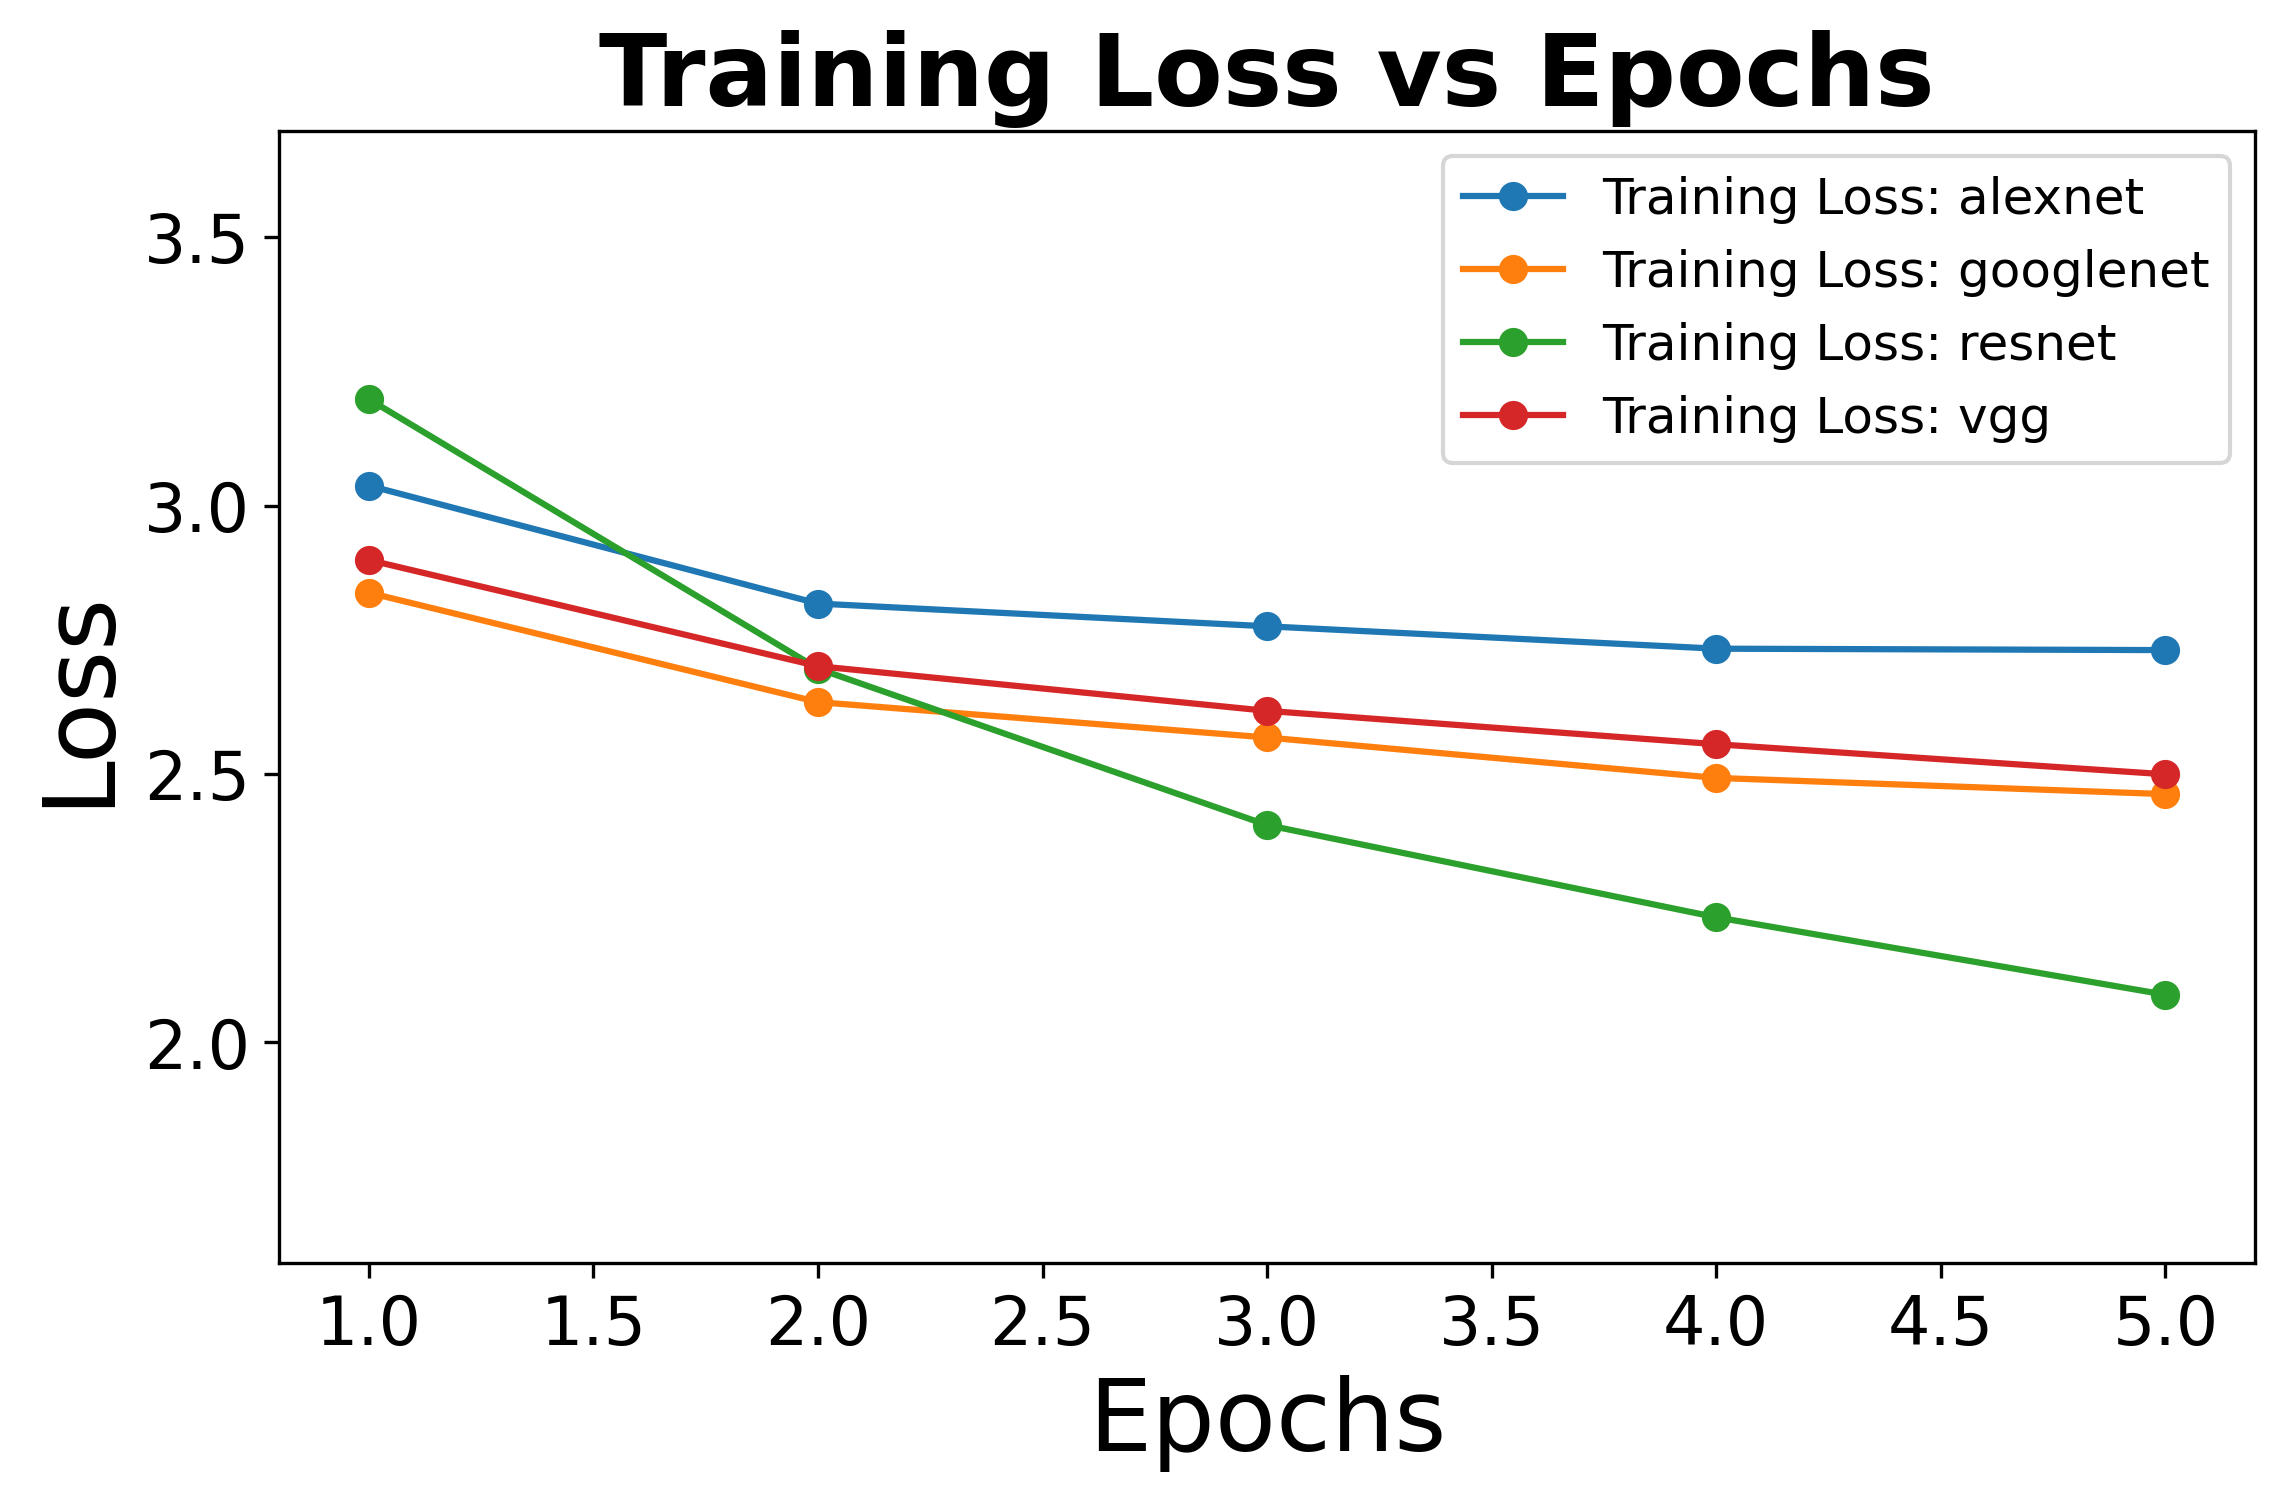

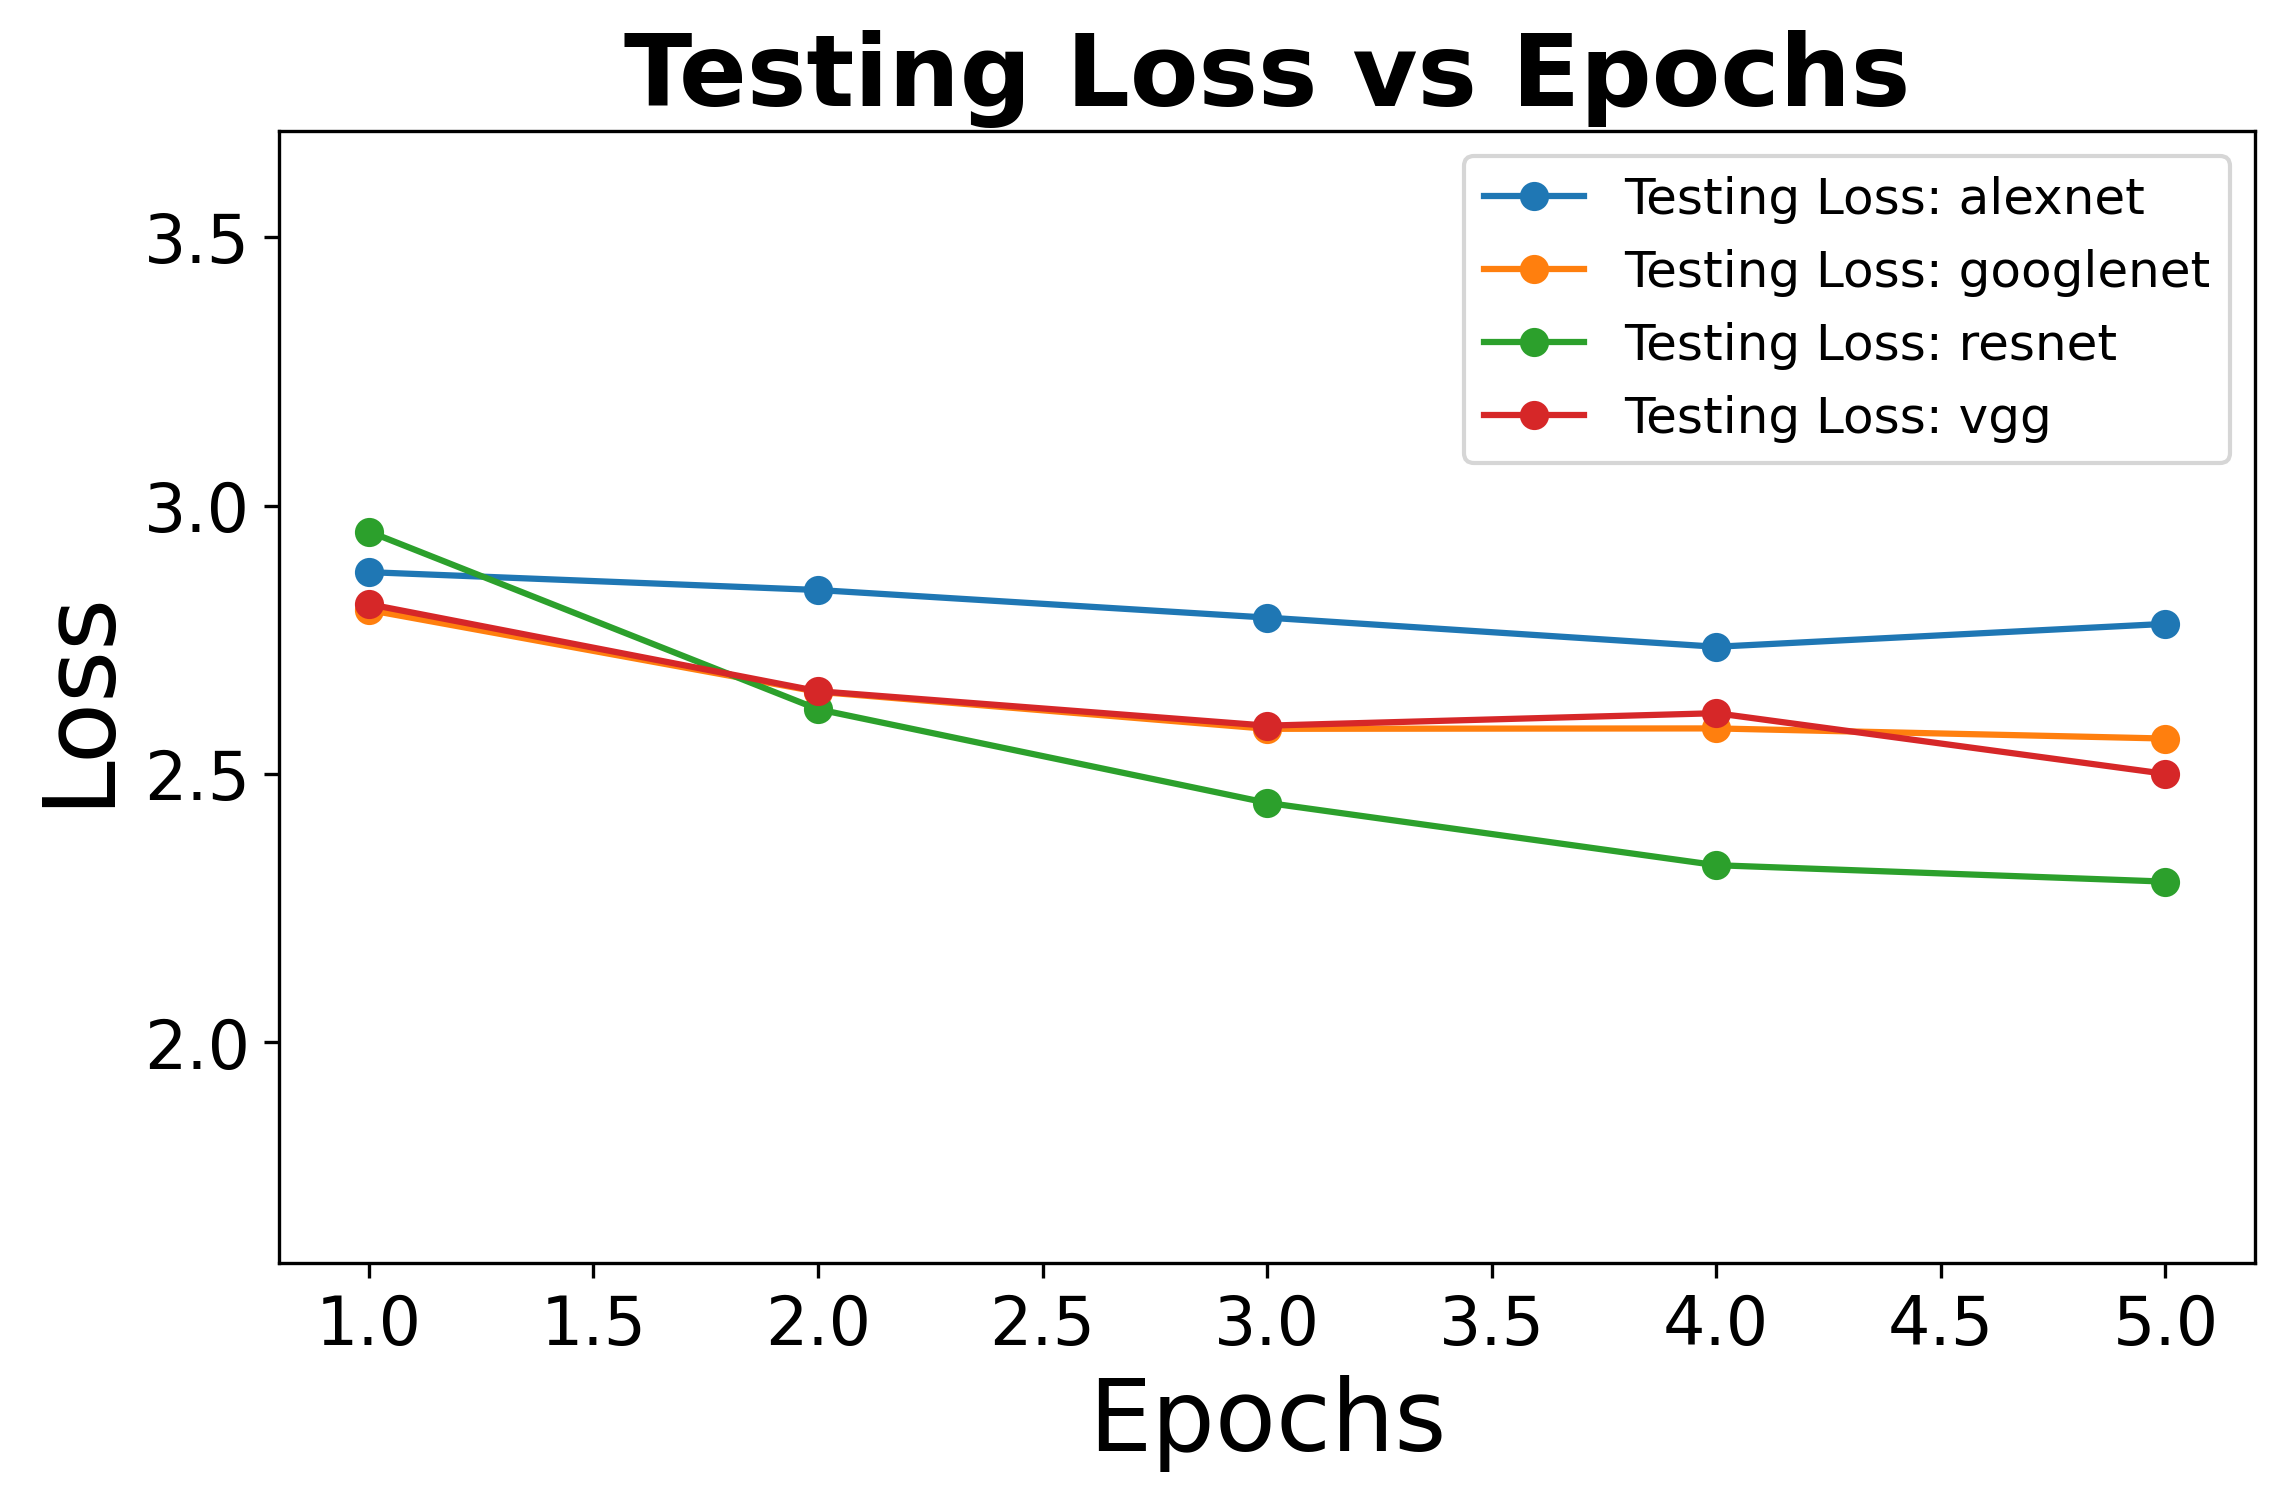

In [4]:
# getting max yval so that plots have same y-axis for better comparison 
max_yval = np.maximum(loss_df['Training Loss'], loss_df['Testing Loss']).max()
min_yval = np.minimum(loss_df['Training Loss'], loss_df['Testing Loss']).min()

# getting the two graphs for testing and training loss 
for loss in ['Training Loss', 'Testing Loss']:
    fig, ax = plt.subplots(figsize = (8.5,5), dpi = 300)
    for model in models:
        ax.plot(loss_df[loss_df['model'] == model]['Epochs'], loss_df[loss_df['model'] == model][loss], '-o', label = loss + ": " + model, linewidth = 1.5)
        ax.set_xlabel("Epochs", fontsize = 24)
        ax.set_ylabel("Loss", fontsize = 24)
        ax.tick_params(
            axis = 'both',
            labelsize = 16)
        ax.legend(fontsize = 12)
        ax.set_ylim([min_yval - 0.5, max_yval + 0.5])
        ax.set_title(loss + " vs Epochs", fontsize = 24, fontweight = 'bold')
    plt.savefig("output/" + loss + " vs Epochs.jpg", dpi = 300, bbox_inches = 'tight')
    plt.savefig("output/" + loss + " vs Epochs.pdf", dpi = 300, bbox_inches = 'tight')    
    plt.show()
        

## Plotting Grouped Barcharts by Accuracy and Model Type

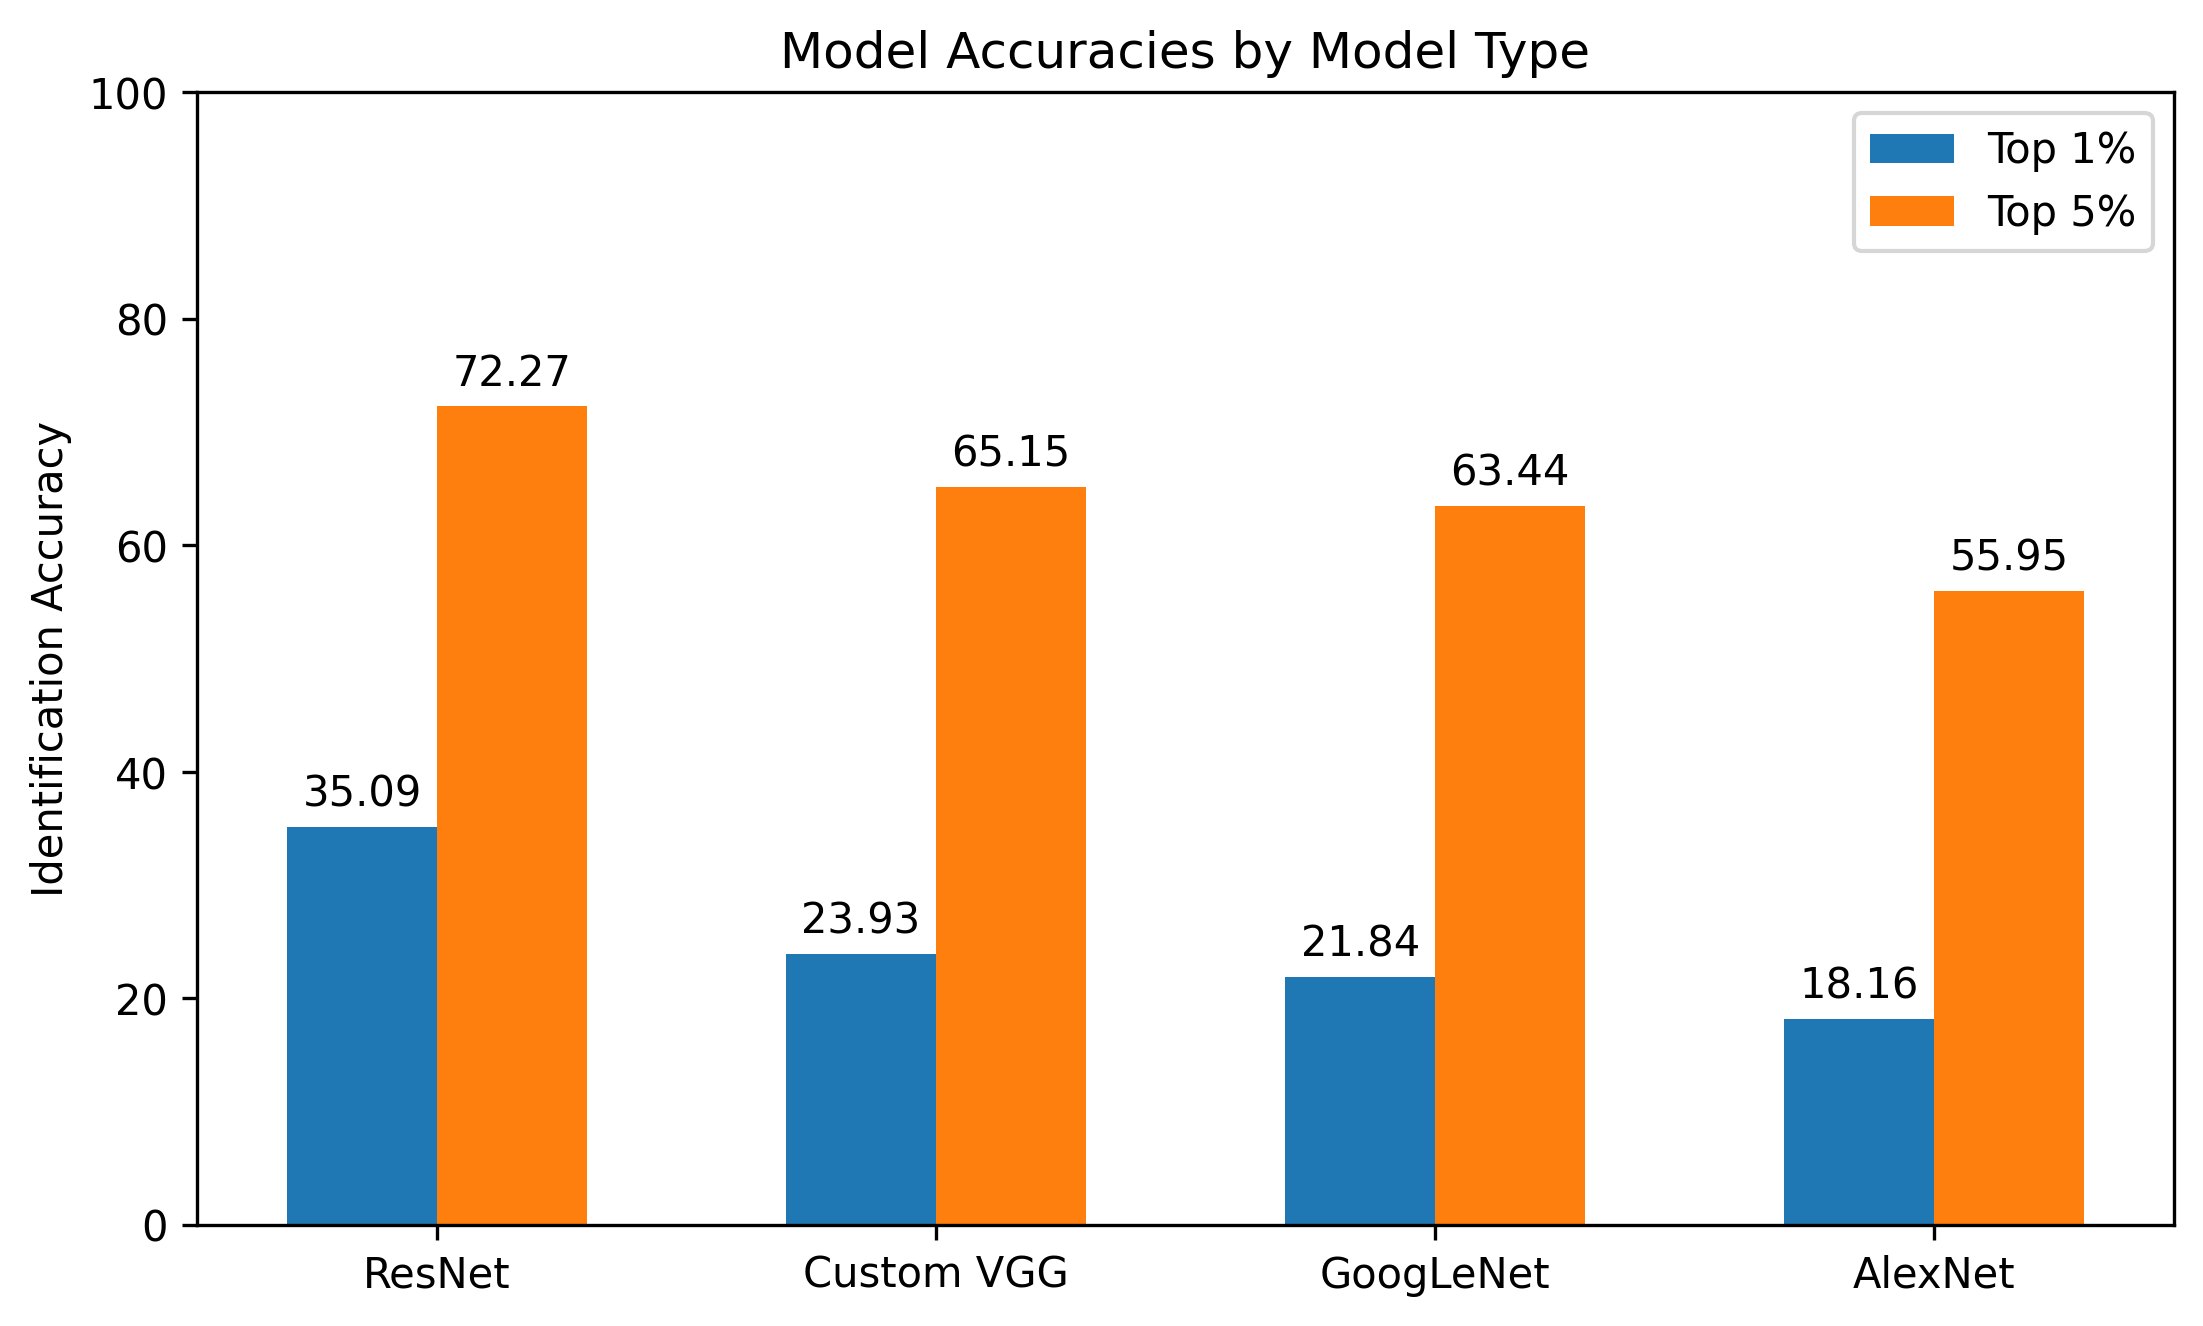

In [5]:
width = 0.3

# plotting grouped barcharts by model 
fig, ax = plt.subplots(figsize = (8.5,5), dpi = 300)
top1 = ax.bar(np.arange(len(classification_results_df)) - width/2, classification_results_df['Top 1%'], width, label = "Top 1%")
top5 = ax.bar(np.arange(len(classification_results_df)) + width/2, classification_results_df['Top 5%'], width, label = "Top 5%")

# adding axis attributes
ax.set_ylabel('Identification Accuracy')
ax.set_title('Model Accuracies by Model Type')
ax.set_ylim([0, 100])
ax.set_xticks(np.arange(len(classification_results_df)))
ax.set_xticklabels(classification_results_df['Description'])

# adding labels on top of bars
ax.bar_label(top1, padding=3, fmt='%.2f')
ax.bar_label(top5, padding=3, fmt='%.2f')
ax.legend()

plt.savefig("output/Model Accuracies.jpg", dpi = 300, bbox_inches = 'tight')
plt.savefig("output/Model Accuracies.pdf", dpi = 300, bbox_inches = 'tight')
plt.show()

## Plotting Heatmaps of Model Classifications versus Ground Truth Classifications

In [6]:
# TODO - need to get predicted versus true values for each of the models 

# for model in models:
    # conf = confusion_matrix(y_pred= pred, y_true = correct)
    # fig,ax = plt.subplots(figsize = (15,15))
    # plt.imshow(conf, interpolation='none', cmap = 'YlOrRd_r')
    # plt.savefig("output/" + model + " Heatmap.jpg", dpi = 300, bbox_inches = 'tight')
    # plt.savefig("output/" + model + " Heatmap.pdf", dpi = 300, bbox_inches = 'tight')    
    # plt.show()